# Parse an example file
Here we load an example file into pycel and parse it all the way through. The network graph is then shown below.

In [1]:
%matplotlib inline
# import basics
from pycel.excelcompiler import ExcelCompiler
from IPython.display import FileLink
import matplotlib.pyplot as plt

Can't import win32com -> switch from Com to Openpyxl wrapping implementation


In [2]:
print "Loading example file"
c = ExcelCompiler(filename='../example/example.xlsx')

Loading example file


/srv/conda/envs/kernel/lib/python2.7/site-packages/openpyxl/reader/worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
print "Compiling..., starting from D1"
sp = c.gen_graph('D1', sheet='Sheet1')

Compiling..., starting from D1
Seed D1 expanded into 1 cells
1 filtered seeds 
1 cells on the todo list
Handling  Sheet1!D1
(('=SUM(A1:A3)',), ('=SUM(A2:A4)',), ('=SUM(A3:A5)',), ('=SUM(A4:A6)',), ('=SUM(A5:A7)',), ('=SUM(A6:A8)',), ('=SUM(A7:A9)',), ('=SUM(A8:A10)',), ('=SUM(A9:A11)',), ('=SUM(A10:A12)',), ('=SUM(A11:A13)',), ('=SUM(A12:A14)',), ('=SUM(A13:A15)',), ('=SUM(A14:A16)',), ('=SUM(A15:A17)',), ('=SUM(A16:A18)',), ('=SUM(A17:A19)',), ('=SUM(A18:A20)',)) [(6L,), (9L,), (12L,), (15L,), (18L,), (21L,), (24L,), (27L,), (30L,), (33L,), (36L,), (39L,), (42L,), (45L,), (48L,), (51L,), (35L,), (18L,)]
(('=SIN(B1*A1^2)',), ('=SIN(B2*A2^2)',), ('=SIN(B3*A3^2)',), ('=SIN(B4*A4^2)',), ('=SIN(B5*A5^2)',), ('=SIN(B6*A6^2)',), ('=SIN(B7*A7^2)',), ('=SIN(B8*A8^2)',), ('=SIN(B9*A9^2)',), ('=SIN(B10*A10^2)',), ('=SIN(B11*A11^2)',), ('=SIN(B12*A12^2)',), ('=SIN(B13*A13^2)',), ('=SIN(B14*A14^2)',), ('=SIN(B15*A15^2)',), ('=SIN(B16*A16^2)',), ('=SIN(B17*A17^2)',), ('=SIN(B18*A18^2)',)) [(-0.2794

/srv/conda/envs/kernel/lib/python2.7/site-packages/Pycel-0.0.1-py2.7.egg/pycel/excelwrapper.py:297: DeprecationWarning: Call to deprecated function get_index (Use wb.index(worksheet)).
/srv/conda/envs/kernel/lib/python2.7/site-packages/Pycel-0.0.1-py2.7.egg/pycel/excelwrapper.py:298: DeprecationWarning: Call to deprecated function get_index (Use wb.index(worksheet)).
/srv/conda/envs/kernel/lib/python2.7/site-packages/openpyxl/worksheet/worksheet.py:499: UserWarning: Using a range string with iter_rows is deprecated. Use ws[range_string]
  warn("Using a range string with iter_rows is deprecated. Use ws[range_string]")


In [4]:
# test evaluation
print "D1 is %s" % sp.evaluate('Sheet1!D1')

D1 is -0.022863768173


Setting A1 to 200
Evalling: Sheet1!D1, linest(_R_("Sheet1!C1:C18"),_R_("Sheet1!B1:B18"),degree=1)[0]
Evalling: Sheet1!C1, sin(_C_("Sheet1!B1")*(_C_("Sheet1!A1")**2))
Evalling: Sheet1!B1, xsum(_R_("Sheet1!A1:A3"))
D1 is now -0.0033119686538833843 (the same should happen in Excel)
Plotting using matplotlib...


/srv/conda/envs/kernel/lib/python2.7/site-packages/Pycel-0.0.1-py2.7.egg/pycel/excellib.py:208: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/srv/conda/envs/kernel/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/srv/conda/envs/kernel/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/srv/conda/envs/kernel/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.

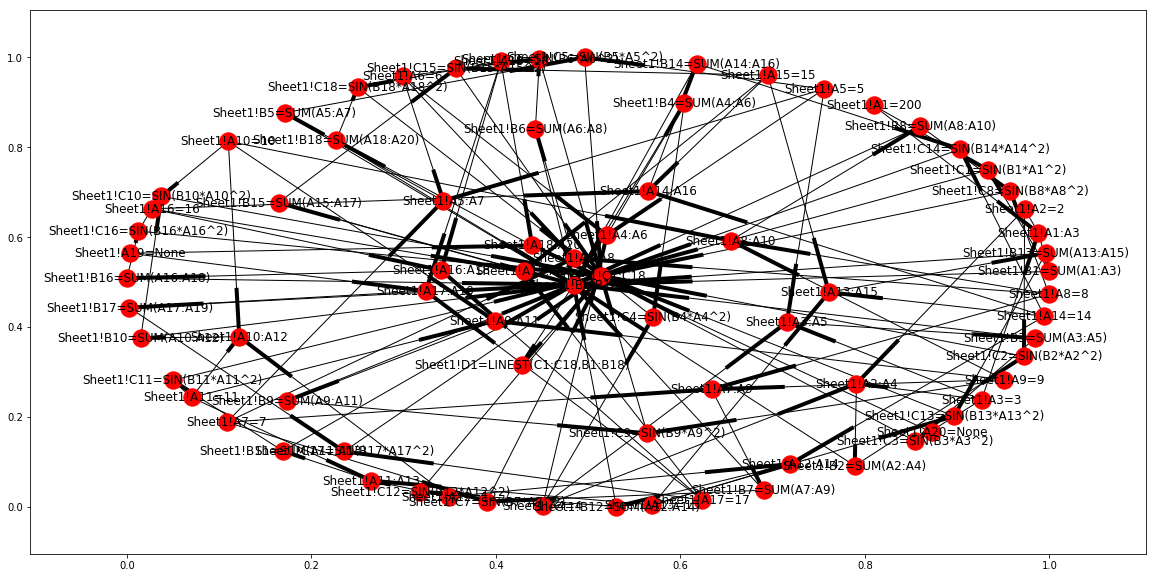

In [5]:
print "Setting A1 to 200"
sp.set_value('Sheet1!A1',200)

print "D1 is now %s (the same should happen in Excel)" % sp.evaluate('Sheet1!D1')

# show the graph using matplotlib
print "Plotting using matplotlib..."
plt.rcParams['figure.figsize'] = (20.0, 10.0) # make the figure a bit bigger
sp.plot_graph()

In [6]:
# export the graph, can be loaded by a viewer like gephi
print "Exporting to gexf..."
sp.export_to_gexf("example.gexf")
FileLink('example.gexf')

Exporting to gexf...


/home/jovyan/notebooks/example.gexf

In [7]:
print "Serializing to disk..."
sp.save_to_file("example.pickle")
FileLink('example.pickle')

Serializing to disk...


/home/jovyan/notebooks/example.pickle